In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["MKL_NUM_THREADS"] = "4"

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
batch_sizes = [4, 8, 16, 32]

lr = 0.001
num_epochs = 20

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Loop over batch sizes
for batch_size in batch_sizes:

    # Print progress message
    print(f"Training with batch size {batch_size}...")

    # Define data loaders
    traindata = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
    trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=2)
    testdata = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
    testloader = torch.utils.data.DataLoader(testdata, batch_size=batch_size, shuffle=False, num_workers=2)

    # Initialize the network
    net = Net()

    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)

    # Train the network
    for epoch in range(num_epochs):
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the network on the test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print accuracy
    print(f"Test Accuracy: {100 * correct / total}%")

Training with batch size 4...
Files already downloaded and verified
Files already downloaded and verified
Test Accuracy: 10.0%
Training with batch size 8...
Files already downloaded and verified
Files already downloaded and verified
Test Accuracy: 65.98%
Training with batch size 16...
Files already downloaded and verified
Files already downloaded and verified
Test Accuracy: 66.12%
Training with batch size 32...
Files already downloaded and verified
Files already downloaded and verified
Test Accuracy: 66.83%


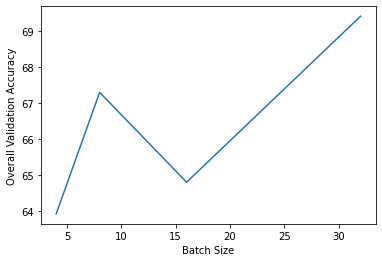

In [3]:
import matplotlib.pyplot as plt

batch_sizes = [4, 8, 16, 32]
accuracies = {}

for batch_size in batch_sizes:
    trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(testdata, batch_size=batch_size, shuffle=False, num_workers=2)

    net = Net()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    for epoch in range(20):
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    accuracies[batch_size] = accuracy

plt.plot(list(accuracies.keys()), list(accuracies.values()))
plt.xlabel('Batch Size')
plt.ylabel('Overall Validation Accuracy')
plt.show()
